In [1]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.filters.morningstar import Q1500US
from quantopian.pipeline.data.sentdex import sentiment
from quantopian.pipeline.data.morningstar import operation_ratios # comes from fundamental data

In [4]:
def make_pipeline():
    testing_factor = operation_ratios.ebitda_margin.latest # this is our factor   
    universe = (Q1500US() & 
               testing_factor.notnull()) # where in Q1500 and testing factor for that company exists
    testing_factor = testing_factor.rank(mask=universe, method = "average")
    # need the factor we pass to alphalens to be ranked from bad to good
    pipe = Pipeline(columns={"testing_factor": testing_factor},
                    screen=universe)
    return pipe 
# all of this creates the actual pipeline - it creates the framework for our test

In [5]:
result = run_pipeline(make_pipeline(), start_date = "2015-01-01", end_date = "2016-01-01")

In [6]:
result.head()

testing_factor
2015-01-02 00:00:00+00:00 Equity(2 [ARNC])            456.0
                          Equity(24 [AAPL])          1065.0
                          Equity(41 [ARCB])           271.0
                          Equity(62 [ABT])            819.0
                          Equity(67 [ADSK])           285.0

In [7]:
assets = result.index.levels[1].unique()
pricing = get_pricing(assets, start_date = "2014-12-01", end_date = "2016-02-01", fields = "open_price")


In [8]:
import alphalens
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor = result["testing_factor"],
                                                                  prices = pricing,
                                                                  quantiles = 2,
                                                                  periods = (1,10,30))

Dropped 5.0% entries from factor data: 5.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Returns Analysis


,1D,10D,30D
Ann. alpha,0.020,0.019,0.013
beta,-0.142,-0.140,-0.170
Mean Period Wise Return Top Quantile (bps),0.777,0.926,1.040
Mean Period Wise Return Bottom Quantile (bps),-0.776,-0.926,-1.043
Mean Period Wise Spread (bps),1.553,1.852,2.083


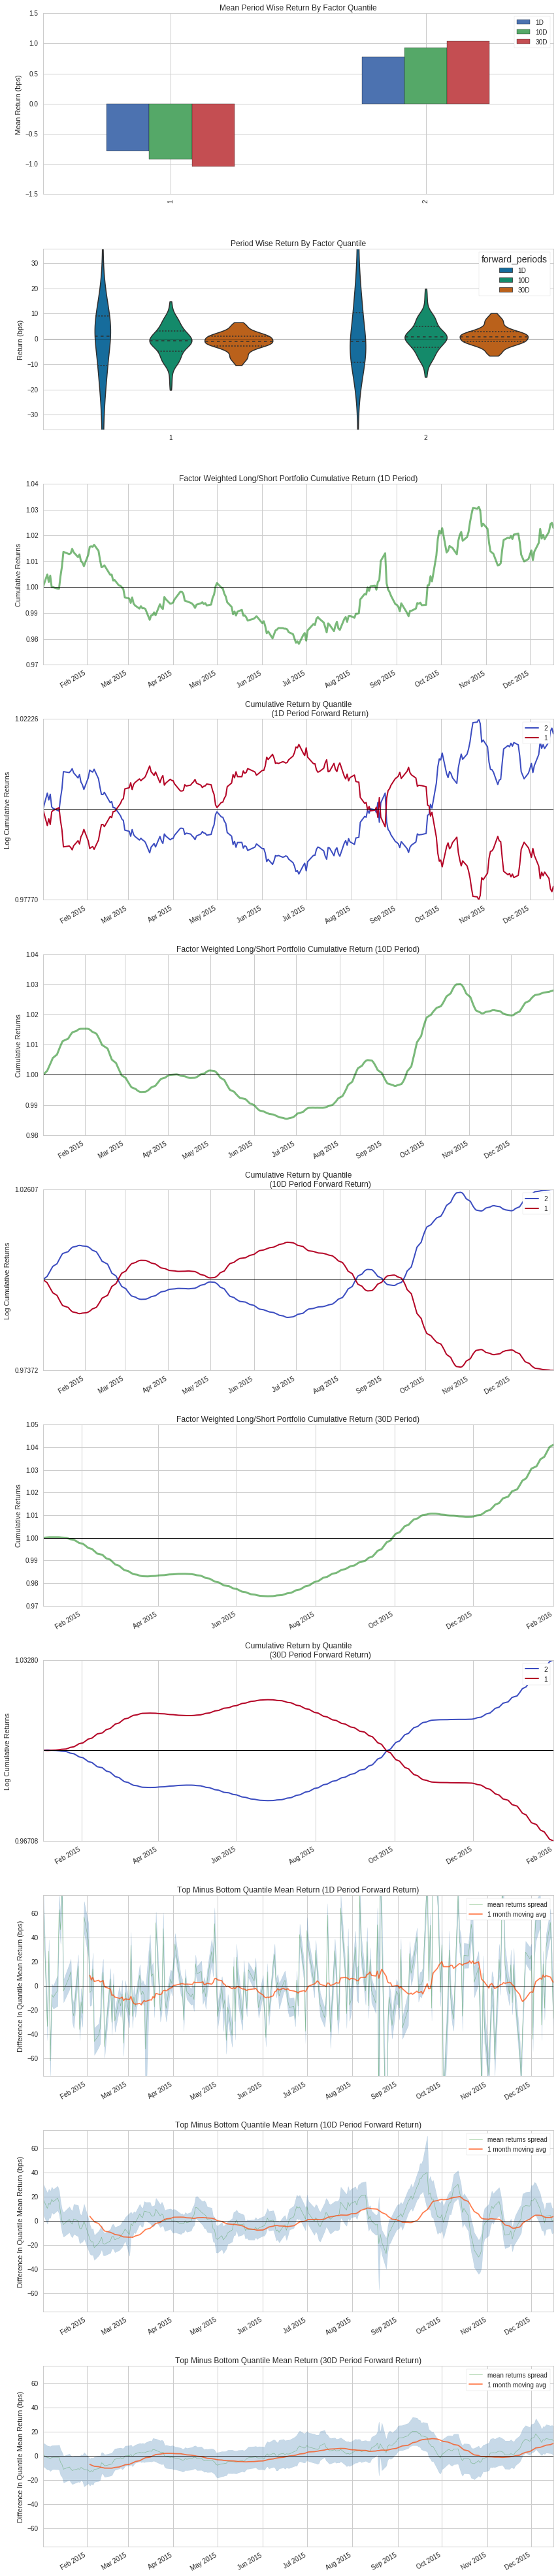

In [9]:
alphalens.tears.create_returns_tear_sheet(factor_data)